In [1]:
#For analysis and numerical functions 
import pandas as pd
import numpy as np
# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
# Extra
import warnings
warnings.filterwarnings(action='ignore')
#Sklearn for Model Building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#Read Data
df = pd.read_csv(r"F:\ML & AI\ML_Linear\assignment\boombike.csv")


In [3]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
#Dropping Casual and registered as their Combined result is present in cnt column
#Dropping dteday as we have month yr as other columns
df.drop(columns=['casual','registered','dteday','instant'],inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [6]:
#Mapping values
df[['season']] = df[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
df[['weekday']] = df[['weekday']].apply(lambda x: x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}))
df[['weathersit']] = df[['weathersit']].apply(lambda x:x.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}))

In [7]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [8]:
num_col = ['temp','atemp','hum','windspeed','cnt']
cat_col = ['yr','mnth','holiday','weekday', 'workingday','weathersit','season']

## EDA 

In [9]:
# Univariate Analysis
# for i in num_col:
#     sns.histplot(x=df[i])
#     plt.show()

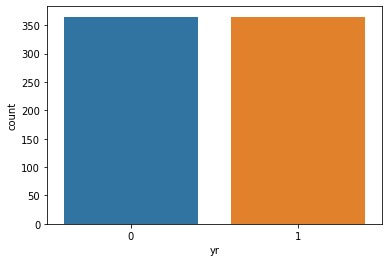

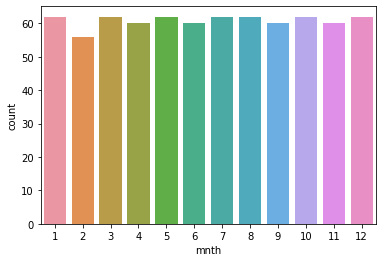

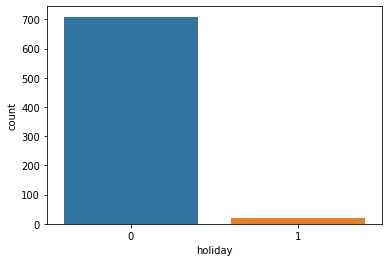

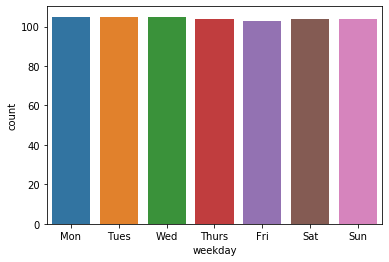

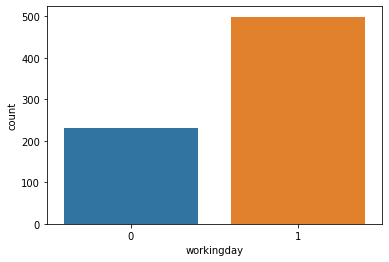

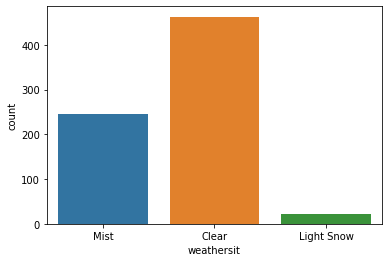

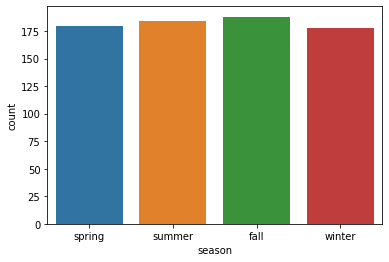

In [10]:
for i in cat_col:
    sns.countplot(x=df[i])
    plt.show()

## Bivariate Analysis


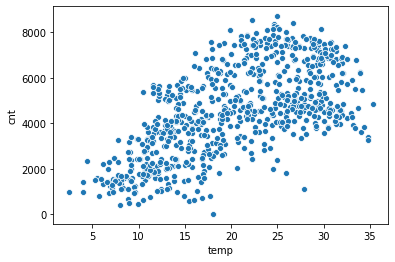

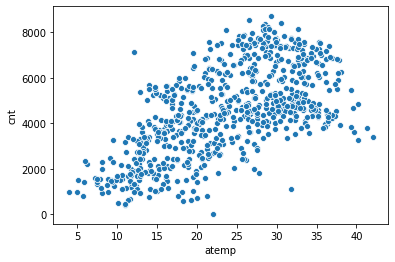

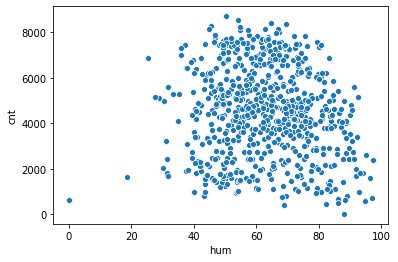

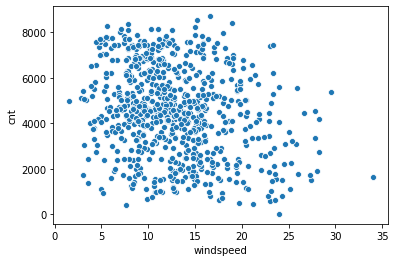

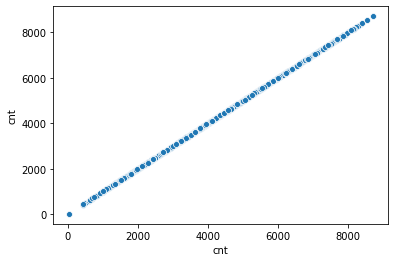

In [11]:
for i in num_col:
    sns.scatterplot(x=df[i],y=df['cnt'])
    plt.show()

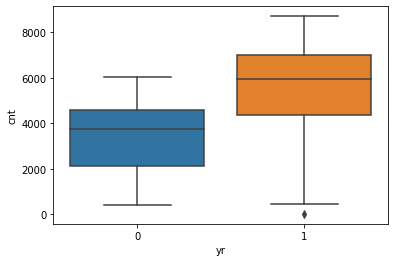

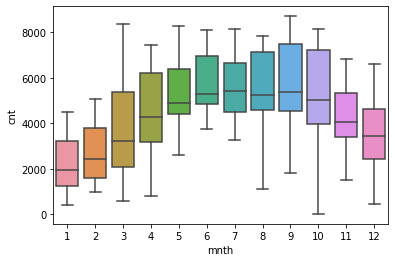

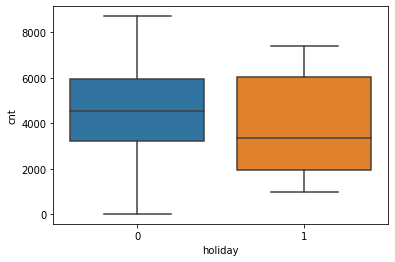

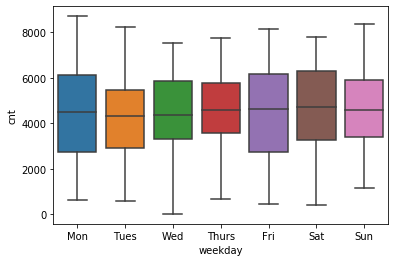

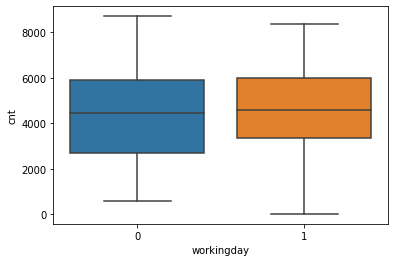

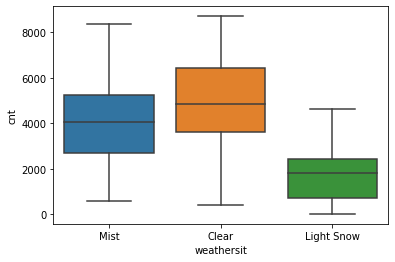

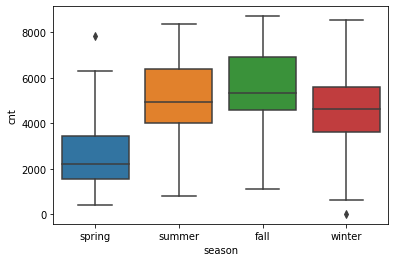

In [12]:
for i in cat_col:
    sns.boxplot(x=df[i],y=df['cnt'])
    plt.show()

# Pre Processing Step
## Dummy Variable creation for Cat_Values

In [13]:
du_season = pd.get_dummies(df['season'],drop_first=True,dtype=int)#Creating n-1 dummy variable for season dropping first column

In [14]:
dum_Weather = pd.get_dummies(df['weathersit'],drop_first=True,dtype=int)#Creating n-1 dummy variables 

In [15]:
du_weekday = pd.get_dummies(df['weekday'],drop_first=True)#creating n-1 dummies for weekday

In [16]:
du_mnth = pd.get_dummies(df['mnth'],drop_first=True)#creating n-1 dummies for month

In [17]:
#Adding dummy variables to original dataframe
df = pd.concat([df,du_season,dum_Weather,du_weekday,du_mnth],axis=1)

In [18]:
df.columns

Index([    'season',         'yr',       'mnth',    'holiday',    'weekday',
       'workingday', 'weathersit',       'temp',      'atemp',        'hum',
        'windspeed',        'cnt',     'spring',     'summer',     'winter',
       'Light Snow',       'Mist',        'Mon',        'Sat',        'Sun',
            'Thurs',       'Tues',        'Wed',            2,            3,
                  4,            5,            6,            7,            8,
                  9,           10,           11,           12],
      dtype='object')

In [19]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Mon,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Tues,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Thurs,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [21]:
df.shape

(730, 30)

In [22]:
df.columns = df.columns.astype(str)

## ReScaling the Numerical Variable

In [23]:
#Instantiate MinMaxscaling object
scaler = MinMaxScaler()

#Fit On Data
df[num_col] = scaler.fit_transform(df[num_col])

## Train-Test Split

In [24]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Light Snow', 'Mist', 'Mon', 'Sat',
       'Sun', 'Thurs', 'Tues', 'Wed', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12'],
      dtype='object')

In [25]:
y = df['cnt']
X= df.drop(['cnt'],axis=1)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

### Feature Selection

In [27]:
# plt.figure(figsize=(16,10))
# sns.heatmap(X_train.corr(),annot=True,cmap='YlGnBu')
# plt.show()

In [28]:
#Feature selection using RFE

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=10)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False])

In [29]:
selected_features=X_train.columns[selector.support_]

In [30]:
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Snow', 'Mist', '9'],
      dtype='object')

In [31]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_train.head()

,yr,holiday,temp,hum,windspeed,spring,winter,Light Snow,Mist,9
653,1,0,0.509887,0.574121,0.329497,0,1,0,0,0
576,1,0,0.815169,0.724079,0.294871,0,0,0,0,0
426,1,0,0.442393,0.638817,0.285911,1,0,0,1,0
728,1,0,0.245101,0.497001,0.676936,1,0,0,0,0
482,1,0,0.395666,0.503427,0.221789,0,0,0,1,0


## Building Model

In [32]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)


In [33]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          8.38e-186
Time:                        19:00:51   Log-Likelihood:                 492.40
No. Observations:                 511   AIC:                            -962.8
Df Residuals:                     500   BIC:                            -916.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3529      0.032     10.876      0.000       0.289       0.417
yr             0.2328      0.008     27.773      0.000       0.216       0.249
holiday       -0.0964      0.026     -3.646      0.000      -0.148      -0.044
temp           0.4297      0.030     14.522      0.000       0.372       0.488
hum           -0.1427      0.039     -3.684      0.000      -0.219      -0.067
windspeed     -0.1689      0.027     -6.154      0.000      -0.223      -0.115
spring        -0.1144      0.015     -7.475      0.000      -0.144      -0.084
winter         0.0557      0.013      4.377      0.000       0.031       0.081
Light Snow    -0.2495      0.027     -9.183      0.000      -0.303      -0.196
Mist          -0.0545      0.011     -5.032      0.000      -0.076      -0.033
9              0.0735      0.016      4.672      0.000       0.043       0.104
==============================================================================
Omnibus:                       62.890   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.311
Skew:                          -0.634   Prob(JB):                     1.14e-34
Kurtosis:                       5.394   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,2.056961
1,holiday,1.042719
2,temp,13.189571
3,hum,21.814641
4,windspeed,4.692243
5,spring,2.552074
6,winter,2.094427
7,Light Snow,1.199168
8,Mist,2.233936
9,9,1.164255


In [35]:
X_train_sm = X_train_sm.drop(['hum'],axis=1)
X_test_sm = X_test_sm.drop(['hum'],axis=1)

In [36]:
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.95e-184
Time:                        19:00:51   Log-Likelihood:                 485.56
No. Observations:                 511   AIC:                            -951.1
Df Residuals:                     501   BIC:                            -908.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2737      0.025     11.126      0.000       0.225       0.322
yr             0.2361      0.008     27.980      0.000       0.220       0.253
holiday       -0.0970      0.027     -3.623      0.000      -0.150      -0.044
temp           0.4065      0.029     13.887      0.000       0.349       0.464
windspeed     -0.1409      0.027     -5.276      0.000      -0.193      -0.088
spring        -0.1175      0.015     -7.596      0.000      -0.148      -0.087
winter         0.0469      0.013      3.706      0.000       0.022       0.072
Light Snow    -0.2882      0.025    -11.359      0.000      -0.338      -0.238
Mist          -0.0775      0.009     -8.649      0.000      -0.095      -0.060
9              0.0694      0.016      4.366      0.000       0.038       0.101
==============================================================================
Omnibus:                       62.397   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.368
Skew:                          -0.642   Prob(JB):                     3.67e-33
Kurtosis:                       5.317   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,34.625877
1,yr,1.018258
2,holiday,1.016266
3,temp,2.492223
4,windspeed,1.077896
5,spring,2.516839
6,winter,1.710834
7,Light Snow,1.049957
8,Mist,1.038689
9,9,1.066724


## Residual Analysis

In [38]:
y_train_pred = res2.predict(X_train_sm)

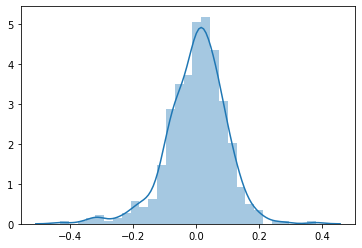

In [39]:
red = y_train - y_train_pred
sns.distplot(red)

## Predictions and Evaluation on Test Set

In [40]:
# Predict on test set
y_test_pred = res2.predict(X_test_sm)

In [41]:
#evaluating with test set
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)
#r2score of the model is 82 and r2score of test data

0.8045301205784539

In [42]:
Adj_r2 = 1 - (1-r2_score(y_test, y_test_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_r2
# Adjusted_r2 is also not dropped too much 

0.7951325302216488

## Linear Equation for cnt
cnt = 0.2361Xyr -0.0970Xholiday +0.4065Xtemp -0.1409XWindspeed -0.1175Xspring +0.0469XWinter -0.2882XLight Snow -0.0775XMist +0.0694X9

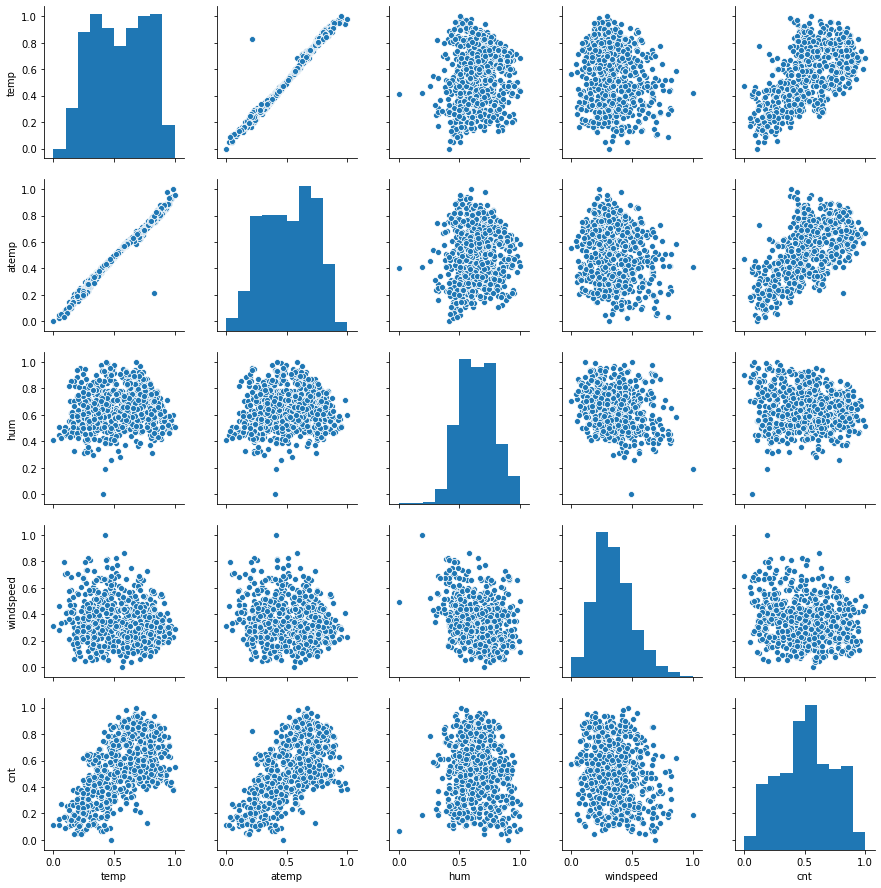

In [47]:
sns.pairplot(df, vars=num_col)
plt.show()